# Plot Statics

In [1]:
import numpy as np
import numpy.random as rn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy.linalg import expm

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['legend.fontsize'] = 8


### Poster Plots ###

In [3]:
dataG_qu = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//Gibbs.csv')) 

data1D_x = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_1D_x_prma_100.csv'))
data1D_z = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_1D_z_prma_100.csv'))
data2D_xy = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_2D_xy_prma_10.csv'))
data2D_xz = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_2D_xz_prma_10.csv'))
data3D_xyz = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_3D_xyz_prma_5.csv'))

data1D_x_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_1D_x_prma.csv'))
data1D_z_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_1D_z_prma.csv'))
data2D_xy_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_2D_xy_prma.csv'))
data2D_xz_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_2D_xz_prma.csv'))
data3D_xyz_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_3D_xyz_prma.csv'))

data3D_tempo = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//TEMPO.csv'))

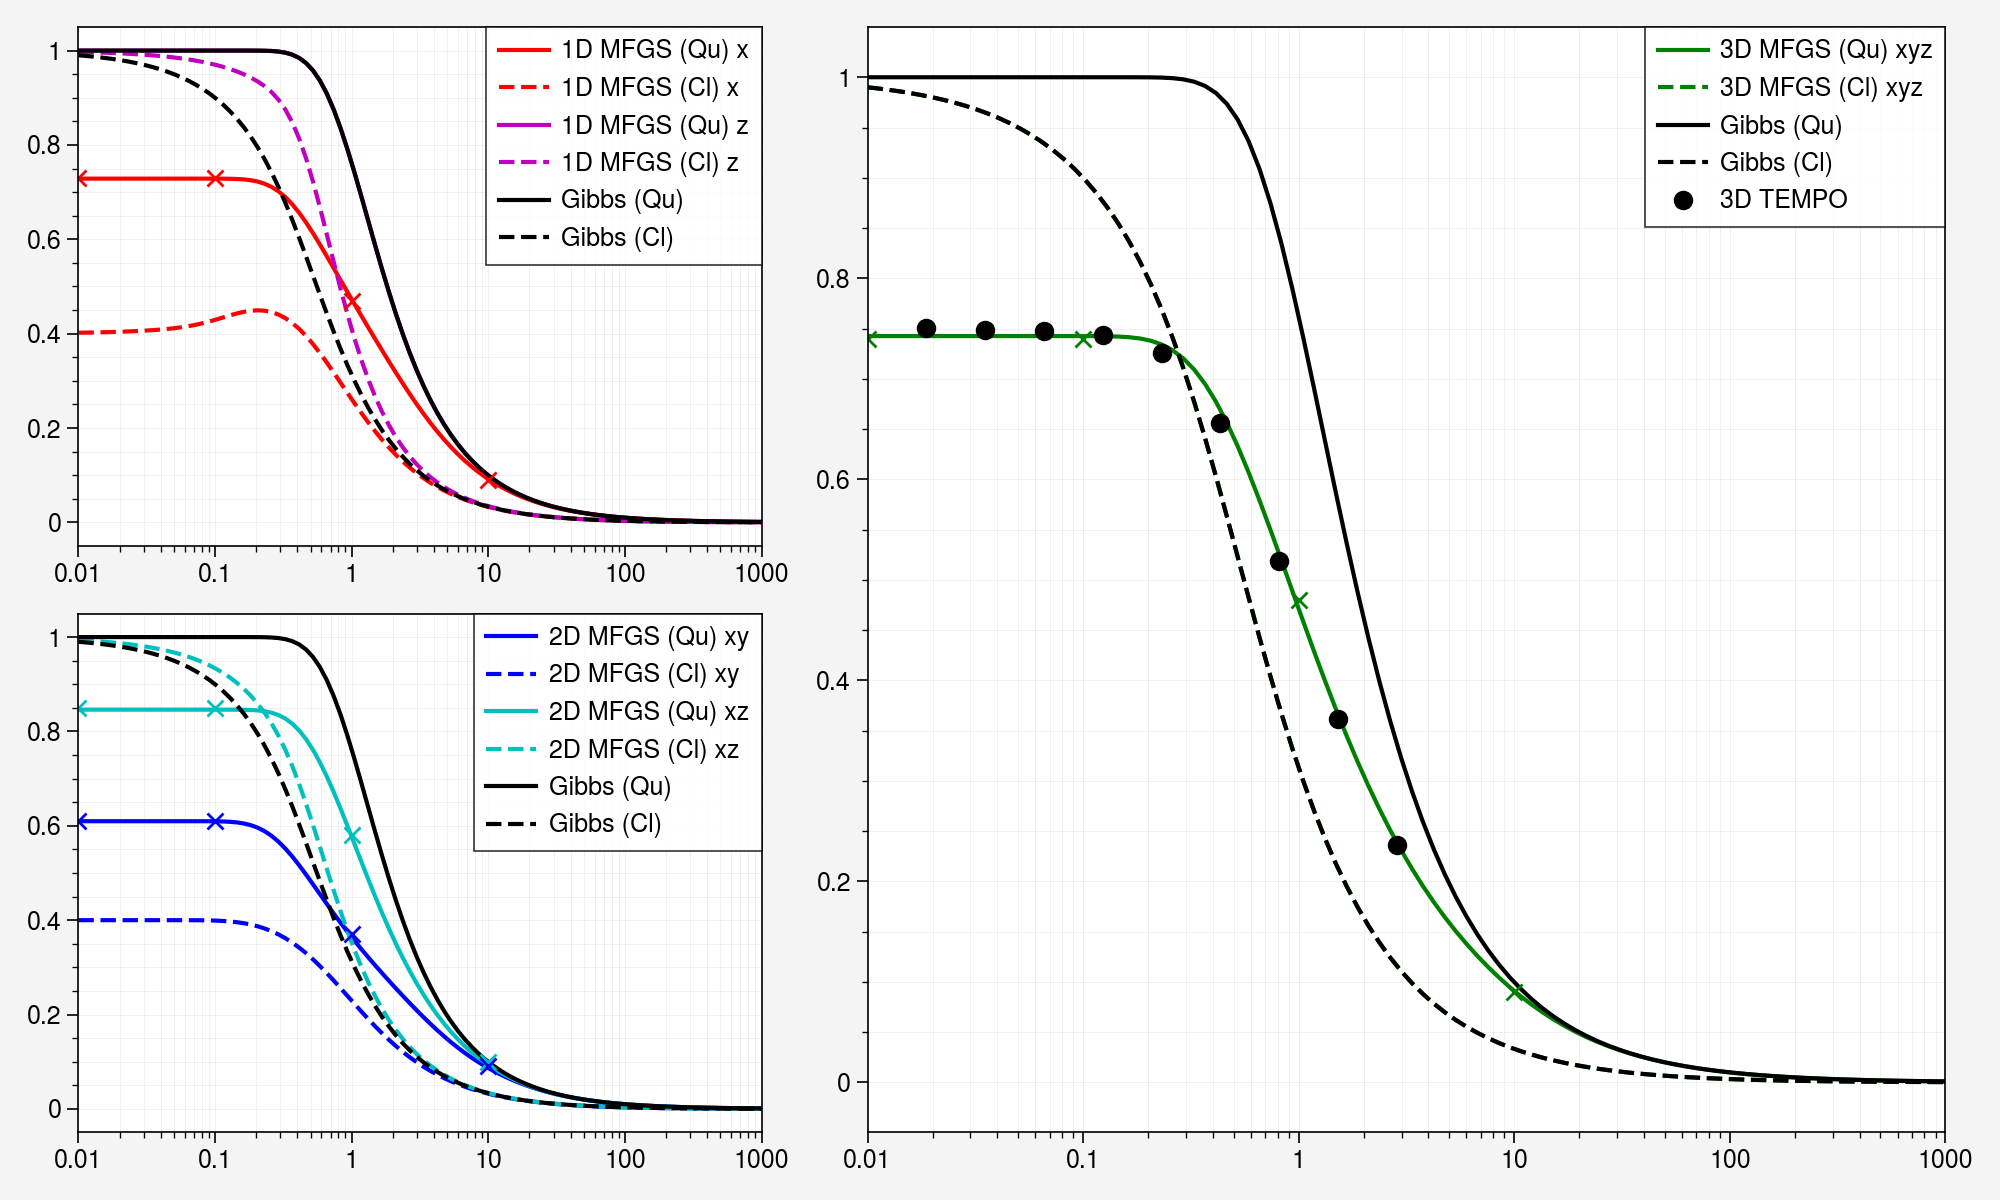

In [66]:
fig = plt.figure()

fig.set_figheight(6)
fig.set_figwidth(10)

ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=2)
ax3 = plt.subplot2grid((2, 5), (0, 2), colspan=3, rowspan=2, sharex=ax1)

ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()

ax1.set_xlim(0.01, 1000)
ax2.set_xlim(0.01, 1000)
ax3.set_xlim(0.01, 1000)

# pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######
ax1.semilogx(data1D_x[:,0], data1D_x[:,1], 'r-', label="1D MFGS (Qu) x") # 1D MFGS X/Y
ax1.semilogx(data1D_x_cl[:,0], data1D_x_cl[:,1], 'r--', label="1D MFGS (Cl) x") # 1D MFGS X/Y
ax1.semilogx(data1D_z[:,0], data1D_z[:,1], 'm-', label="1D MFGS (Qu) z") # 1D MFGS Z
ax1.semilogx(data1D_z_cl[:,0], data1D_z_cl[:,1], 'm--', label="1D MFGS (Cl) z") # 1D MFGS Z
ax1.semilogx(dataG_qu[:,0], dataG_qu[:,1], 'k-', label="Gibbs (Qu)") # Gibbs State
ax1.semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), 'k--', label="Gibbs (Cl)")
ax1.grid(which='both', lw='0.2')

ax1.plot(0.01, 0.73, 'rx')
ax1.plot(0.1, 0.73, 'rx')
ax1.plot(1, 0.47, 'rx')
ax1.plot(10, 0.09, 'rx')

ax2.semilogx(data2D_xy[:,0], data2D_xy[:,1], 'b-', label="2D MFGS (Qu) xy") # 2D MFGS XY
ax2.semilogx(data2D_xy_cl[:,0], data2D_xy_cl[:,1], 'b--', label="2D MFGS (Cl) xy") # 2D MFGS XY
ax2.semilogx(data2D_xz[:,0], data2D_xz[:,1], 'c-',label="2D MFGS (Qu) xz") # 2D MFGS XZ
ax2.semilogx(data2D_xz_cl[:,0], data2D_xz_cl[:,1], 'c--', label="2D MFGS (Cl) xz") # 2D MFGS XY
ax2.semilogx(dataG_qu[:,0], dataG_qu[:,1], 'k-', label="Gibbs (Qu)") # Gibbs State
ax2.semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), 'k--', label="Gibbs (Cl)")
ax2.grid(which='both', lw='0.2')

ax2.plot(0.01, 0.85, 'cx')
ax2.plot(0.1, 0.85, 'cx')
ax2.plot(1, 0.58, 'cx')
ax2.plot(10, 0.1, 'cx')

ax2.plot(0.01, 0.61, 'bx')
ax2.plot(0.1, 0.61, 'bx')
ax2.plot(1, 0.37, 'bx')
ax2.plot(10, 0.09, 'bx')

ax3.semilogx(data3D_xyz[:,0], data3D_xyz[:,1], 'g-', label="3D MFGS (Qu) xyz") # 3D MFGS XYZ
ax3.semilogx(data3D_xyz_cl[:,0], data3D_xyz_cl[:,1], 'g--', label="3D MFGS (Cl) xyz") # 3D MFGS XYZ
ax3.semilogx(dataG_qu[:,0], dataG_qu[:,1], 'k-', label="Gibbs (Qu)") # Gibbs State
ax3.semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), 'k--', label="Gibbs (Cl)") # Gibbs State
ax3.semilogx(data3D_tempo[:,0], data3D_tempo[:,1], 'ko', label="3D TEMPO") # Gibbs State
ax3.grid(which='both', lw='0.2')

ax3.plot(0.01, 0.74, 'gx')
ax3.plot(0.1, 0.74, 'gx')
ax3.plot(1, 0.48, 'gx')
ax3.plot(10, 0.09, 'gx')

ax1.legend(ncol=1)
ax2.legend(ncol=1)
ax3.legend(ncol=1)

fig.text(0.5, -0.04, "$2k_B T/\hbar\omega_L$", fontsize=16, ha='center')
fig.text(-0.04, 0.5, "$\langle \\hat{S}_z\\rangle$", fontsize=16, va='center', rotation='vertical')

fig.tight_layout()

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//Statics//dim_comp_prma_100105.pdf", dpi=600, bbox_inches='tight')

### Paper Plots ###

#### Data Import (Mac) ####

In [2]:
#### Gibbs ####
dataG_qu = np.array(pd.read_csv(r'../paper_data/qu_Gibbs.csv'))
dataG_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_Gibbs.csv'))

#### prmd ####
data1D_prmd = np.array(pd.read_csv(r'../paper_data/qu_MFGS_1D_prmd_150.csv'))
data1D_prmd_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_MFGS_1D_prmd.csv'))

data3D_prmd = np.array(pd.read_csv(r'../paper_data/qu_MFGS_3D_prmd_5.csv'))
data3D_prmd_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_MFGS_3D_prmd.csv'))

data_tempo = np.array(pd.read_csv(r'../paper_data/TEMPO.csv'))

#### prmc - Weak ####
data3D_wk = np.array(pd.read_csv(r'../paper_data/WK_analytical_prmc.csv'))
data3D_MFGS_wk = np.array(pd.read_csv(r'../paper_data/WK_MFGS_prmc.csv'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_Gibbs.csv'

#### Data Import (Windows) ####

In [2]:
#### Gibbs ####
dataG_qu = np.array(pd.read_csv(r'../paper_data/qu_Gibbs.csv'))
dataG_cl = np.array(pd.read_csv(r'C://Users/crh222/ClassicalSpinMFGS/paper_data/cl_Gibbs.csv'))

#### prmd ####
data1D_prmd = np.array(pd.read_csv(r'../paper_data/qu_MFGS_1D_prmd_150.csv'))
data1D_prmd_cl = np.array(pd.read_csv(r'C://Users/crh222/ClassicalSpinMFGS/paper_data/cl_MFGS_1D_prmd.csv'))

data3D_prmd = np.array(pd.read_csv(r'../paper_data/qu_MFGS_3D_prmd_5.csv'))
data3D_prmd_cl = np.array(pd.read_csv(r'C://Users/crh222/ClassicalSpinMFGS/paper_data/cl_MFGS_3D_prmd.csv'))

data_tempo = np.array(pd.read_csv(r'../paper_data/TEMPO.csv'))

#### prmc - Weak ####
data3D_wk = np.array(pd.read_csv(r'../paper_data/WK_analytical_prmc.csv'))
data3D_MFGS_wk = np.array(pd.read_csv(r'../paper_data/WK_MFGS_prmc.csv'))

#### sz ####

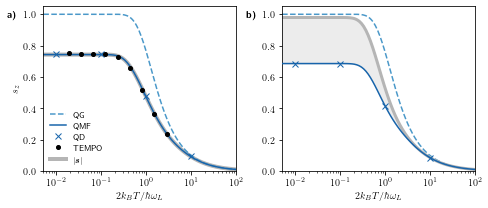

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(6.75, 3))  #size in inches

bcmap = plt.get_cmap('Blues')
ocmap = plt.get_cmap('YlGn')
gcmap = plt.get_cmap('Greys')

ax[0].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[1].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[0].set_ylabel("$s_z$")

for i in [0, 1]:
        ax[i].set_xlim(0.5e-2, 1.0e2)
        ax[i].set_ylim(0.0, 1.05)

def clGibbs(T):
    return(1/np.tanh(1/T) - T)

##### Data 3D ######

## Classical ##
# ax[0].semilogx(dataG_qu[:,0], clGibbs(dataG_qu[:,0]), 'r-') # Gibbs (Analytical)
# ax[0].semilogx(dataG_cl[:,0], dataG_cl[:,3], color=ocmap(0.4), linestyle='--', zorder=2, label='CG') # Gibbs (Numerical)
# ax[0].semilogx(data3D_prmd_cl[:,0], data3D_prmd_cl[:,3], color=ocmap(0.8), linestyle='-', linewidth=3, zorder=1, label='CMF') # MFGS

## Quantum ##
ax[0].semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', label='QG') # Gibbs
ax[0].semilogx(data3D_prmd[:,0], data3D_prmd[:,3], color=bcmap(0.8), label='QMF') # MFGS
ax[0].plot(0.01, 0.745, color=bcmap(0.8), marker='x', linestyle='None', label='QD') # Dynamics
ax[0].plot(0.1, 0.745, color=bcmap(0.8), marker='x', linestyle='None') # Dynamics
ax[0].plot(1, 0.476, color=bcmap(0.8), marker='x', linestyle='None') # Dynamics
ax[0].plot(10, 0.0942, color=bcmap(0.8), marker='x', linestyle='None') # Dynamics
ax[0].semilogx(data_tempo[:,0], data_tempo[:,1], 'ko', markersize=4, label='TEMPO') # TEMPO

ax[0].semilogx(data3D_prmd[:,0], np.sqrt(data3D_prmd[:,1]**2 + data3D_prmd[:,2]**2 + data3D_prmd[:,3]**2), color=gcmap(0.4), linestyle='-', linewidth=4, zorder=0, label='$|\\bm{s}|$') # MFGS

##### Data 1D ######

## Classical ##
# ax[1].semilogx(dataG_qu[:,0], clGibbs(dataG_qu[:,0]), 'r-') # Gibbs (Analytical)
# ax[1].semilogx(dataG_cl[:,0], dataG_cl[:,3], color=ocmap(0.4), linestyle='--', zorder=2, label='CG') # Gibbs (Numerical)
# ax[1].semilogx(data1D_prmd_cl[:,0], data1D_prmd_cl[:,3], color=ocmap(0.8), linestyle='-', linewidth=3, zorder=0) # MFGS

## Quantum ##
ax[1].semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', zorder=1) # Gibbs
ax[1].semilogx(data1D_prmd[:,0], data1D_prmd[:,3], color=bcmap(0.8), zorder=3) # MFGS

ax[1].plot(0.01, 0.685, color=bcmap(0.8), marker='x', linestyle='None', zorder=4) # Dynamics
ax[1].plot(0.1, 0.685, color=bcmap(0.8), marker='x', linestyle='None', zorder=4) # Dynamics
ax[1].plot(1, 0.417, color=bcmap(0.8), marker='x', linestyle='None', zorder=4) # Dynamics
ax[1].plot(10, 0.086, color=bcmap(0.8), marker='x', linestyle='None', zorder=4) # Dynamics

ax[1].fill_between(data1D_prmd[:,0], np.sqrt(data1D_prmd[:,1]**2 + data1D_prmd[:,2]**2 + data1D_prmd[:,3]**2), data1D_prmd[:,3], color=gcmap(0.15), zorder=0)

ax[1].semilogx(data1D_prmd[:,0], np.sqrt(data1D_prmd[:,1]**2 + data1D_prmd[:,2]**2 + data1D_prmd[:,3]**2), color=gcmap(0.4), linestyle='-', linewidth=3, zorder=2) # MFGS

ax[0].text(0.08e-2, 0.98, '\\textbf{a)}')
ax[1].text(0.08e-2, 0.98, '\\textbf{b)}')

ax[0].legend(ncol=1, loc='lower left', frameon=False)

fig.tight_layout(w_pad = 1.4)

# plt.savefig('/Users/charliehogg/Dropbox/PhD/1. 3D Project/Paper/Graphs/sz_T_prmd_1D_3D.pdf', dpi=300) # Export for Mac
plt.savefig('C://Users//crh222//Dropbox//PhD//1. 3D Project///Paper//Graphs//sz_T_prmd_1D_3D.pdf', dpi=300) # Export for Windows

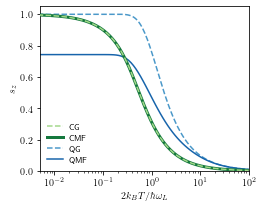

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(3.75, 3))  #size in inches

bcmap = plt.get_cmap('Blues')
ocmap = plt.get_cmap('YlGn')
gcmap = plt.get_cmap('Greys')

ax.set_xlabel("$2k_B T/\hbar\omega_L$")
ax.set_ylabel("$s_z$")

ax.set_xlim(0.5e-2, 1.0e2)
ax.set_ylim(0.0, 1.05)

def clGibbs(T):
    return(1/np.tanh(1/T) - T)

##### Data 3D ######

## Classical ##
# ax.semilogx(dataG_qu[:,0], clGibbs(dataG_qu[:,0]), 'r-') # Gibbs (Analytical)
ax.semilogx(dataG_cl[:,0], dataG_cl[:,3], color=ocmap(0.4), linestyle='--', zorder=4, label='CG') # Gibbs (Numerical)
ax.semilogx(data3D_prmd_cl[:,0], data3D_prmd_cl[:,3], color=ocmap(0.8), linestyle='-', linewidth=3, zorder=3, label='CMF') # MFGS

## Quantum ##
ax.semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', label='QG', zorder=0) # Gibbs
ax.semilogx(data3D_prmd[:,0], data3D_prmd[:,3], color=bcmap(0.8), label='QMF', zorder=1) # MFGS

ax.legend(ncol=1, loc='lower left', frameon=False)

fig.tight_layout(w_pad = 1.4)

# plt.savefig('/Users/charliehogg/Dropbox/PhD/1. 3D Project/Paper/Graphs/sz_T_prmd_qu_cl.pdf', dpi=300) # Export for Mac
plt.savefig('C://Users//crh222//Dropbox//PhD//1. 3D Project///Paper//Graphs//sz_T_prmd_qu_cl.pdf', dpi=300) # Export for Windows

#### sx,y ####

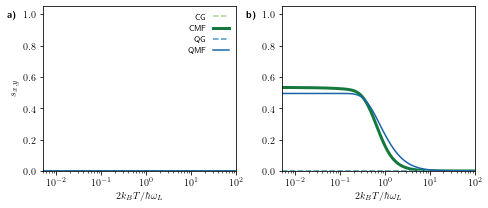

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(6.75, 3))  #size in inches

bcmap = plt.get_cmap('Blues')
ocmap = plt.get_cmap('YlGn')
gcmap = plt.get_cmap('Greys')

ax[0].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[1].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[0].set_ylabel("$s_{x,y}$")

for i in [0, 1]:
        ax[i].set_xlim(0.5e-2, 1.0e2)
        ax[i].set_ylim(0.0, 1.05)

##### Data 3D ######

## Classical ##
ax[0].semilogx(dataG_cl[:,0], dataG_cl[:,1], color=ocmap(0.4), linestyle='--', zorder=2, label='CG') # Gibbs (Numerical)
ax[0].semilogx(data3D_prmd_cl[:,0], data3D_prmd_cl[:,1], color=ocmap(0.8), linestyle='-', linewidth=3, zorder=1, label='CMF') # MFGS

## Quantum ##
ax[0].semilogx(dataG_qu[:,0], dataG_qu[:,1], color=bcmap(0.6), linestyle='--', label='QG') # Gibbs
ax[0].semilogx(data3D_prmd[:,0], data3D_prmd[:,1], color=bcmap(0.8), label='QMF') # MFGS

##### Data 1D ######

## Classical ##
ax[1].semilogx(dataG_cl[:,0], dataG_cl[:,1], color=ocmap(0.4), linestyle='--', zorder=2, label='CG') # Gibbs (Numerical)
ax[1].semilogx(data1D_prmd_cl[:,0], data1D_prmd_cl[:,1], color=ocmap(0.8), linestyle='-', linewidth=3, zorder=0) # MFGS

## Quantum ##
ax[1].semilogx(dataG_qu[:,0], dataG_qu[:,1], color=bcmap(0.6), linestyle='--') # Gibbs
ax[1].semilogx(data1D_prmd[:,0], data1D_prmd[:,1], color=bcmap(0.8)) # MFGS

ax[0].text(0.08e-2, 0.98, '\\textbf{a)}')
ax[1].text(0.08e-2, 0.98, '\\textbf{b)}')

ax[0].legend(ncol=1, loc='upper right', frameon=False, markerfirst=False)

fig.tight_layout(w_pad = 1.4)

# plt.savefig('/Users/charliehogg/Dropbox/PhD/1. 3D Project/Paper/Graphs/sxy_T_prmd_1D_3D.pdf', dpi=300) # Export for Mac
plt.savefig('C://Users//crh222//Dropbox//PhD//1. 3D Project///Paper//Graphs//sxy_T_prmd_1D_3D.pdf', dpi=300) # Export for Windows

#### Weak ####

C:\Users\crh222\AppData\Local\Temp\ipykernel_5240\566693739.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(w_pad = 0.5)


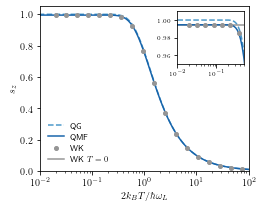

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(3.75, 3))  #size in inches

bcmap = plt.get_cmap('Blues')
ocmap = plt.get_cmap('YlGn')
rcmap = plt.get_cmap('Greys')

ax.set_xlabel("$2k_B T/\hbar\omega_L$")
ax.set_ylabel("$s_z$")

ax.set_xlim(1.0e-2, 1.0e2)
ax.set_ylim(0.0, 1.05)

##### Weak ######

ax.semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', label='QG') # Gibbs
ax.semilogx(data3D_MFGS_wk[:,0], data3D_MFGS_wk[:,1], color=bcmap(0.8), label='QMF') # MFGS
ax.semilogx(2*data3D_wk[:,0], data3D_wk[:,1], 'o', markersize=4, label='WK', color=rcmap(0.5)) # Weak Approximation

axins0 = inset_axes(ax, width="32%", height="32%", loc=1, borderpad=0.6)
axins0.semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--')
axins0.axhline(0.9944940859343847, color=rcmap(0.5), label='WK $T=0$')
axins0.semilogx(data3D_MFGS_wk[:,0], data3D_MFGS_wk[:,1], color=bcmap(0.8))
axins0.semilogx(2*data3D_wk[:,0], data3D_wk[:,1], 'o', markersize=4, color=rcmap(0.5))

axins0.tick_params(labelsize=6)

axins0.set_xlim(1.0e-2, 0.5)
axins0.set_ylim(0.95, 1.01)

fig.legend(ncol=1, loc=(0.17, 0.2), frameon=False)

fig.tight_layout(w_pad = 0.5)

# plt.savefig('/Users/charliehogg/Dropbox/PhD/1. 3D Project/Paper/Graphs/wk.pdf', dpi=300) # Export for Mac
plt.savefig('C://Users/crh222/Dropbox/PhD/1. 3D Project/Paper/Graphs/wk.pdf', dpi=300) # Export for Windows

### Ultrastrong Guesses ###

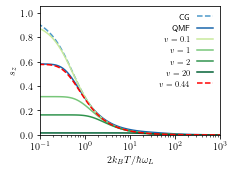

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(3.35, 2.5))  #size in inches

bcmap = plt.get_cmap('Blues')
ocmap = plt.get_cmap('YlGn')

ax.set_xlabel("$2k_B T/\hbar\omega_L$")
ax.set_ylabel("$s_z$")

ax.set_xlim(1.0e-1, 1.0e3)
ax.set_ylim(0.0, 1.05)

def clGibbs(T):
    return(1/np.tanh(1/T) - T)

def exponent(v, T):
    return(1/((v/T)*(1/np.tanh(v/T))))

def janetGuess(v, T):
    sigmaz = np.array([[1, 0], [0, -1]])
    Hs = -1*sigmaz
    def state(T):
        partition = np.trace(expm((1/T)*exponent(v, T)*Hs))
        return(-(1/partition)*expm((1/T)*exponent(v, T)*Hs))
    return(np.trace(state(T)*sigmaz))

def janetGuessCl(v, T):
    x = (1/T)*1/((v/T)*(1/np.tanh(v/T)))
    return(1/np.tanh(x) - (1/x))

listv01= []
list044 = []
listv1 = []
listv2 = []
listv20 = []

for i in range(0, 100):
    listv01.append(janetGuessCl(0.1, dataG_qu[i,0]))
    list044.append(janetGuessCl(1/np.sqrt(5), dataG_qu[i,0]))
    listv1.append(janetGuessCl(1, dataG_qu[i,0]))
    listv2.append(janetGuessCl(2, dataG_qu[i,0]))
    listv20.append(janetGuessCl(20, dataG_qu[i,0]))


ax.semilogx(dataG_qu[:,0], clGibbs(dataG_qu[:,0]), color=bcmap(0.6), linestyle='--', label='CG') # Gibbs

# ax.semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', label='QG') # Gibbs
# ax.semilogx(data3D_MFGS_us_prmg[:,0], data3D_MFGS_us_prmg[:,3], color=bcmap(0.6), label='$\\alpha = 20$') # MFGS
# ax.semilogx(data3D_MFGS_us_prmh[:,0], data3D_MFGS_us_prmh[:,3], color=bcmap(0.7), label='$\\alpha = 60$') # MFGS
# ax.semilogx(data3D_MFGS_us_prmi[:,0], data3D_MFGS_us_prmi[:,3], color=bcmap(0.8), label='$\\alpha = 80$') # MFGS
# ax.semilogx(data3D_MFGS_us_prmj[:,0], data3D_MFGS_us_prmj[:,3], color=bcmap(0.9), label='$\\alpha = 500$') # MFGS
ax.semilogx(data3D_MFGS_us_prmk[:,0], data3D_MFGS_us_prmk[:,3], color=bcmap(0.8), label='QMF') # MFGS

# ax.axhline(1/np.sqrt(3), color='r', label='US GS', zorder=0)

ax.semilogx(dataG_qu[:,0], listv01, color=ocmap(0.3), linestyle='-', label='$v=0.1$')
ax.semilogx(dataG_qu[:,0], listv1, color=ocmap(0.5), linestyle='-', label='$v=1$')
ax.semilogx(dataG_qu[:,0], listv2, color=ocmap(0.7), linestyle='-', label='$v=2$')
ax.semilogx(dataG_qu[:,0], listv20, color=ocmap(0.9), linestyle='-', label='$v=20$')

ax.semilogx(dataG_qu[:,0], list044, color='r', linestyle='--', label = '$v=0.44$')

ax.legend(ncol=1, frameon=False, markerfirst=False)

fig.tight_layout()

# plt.savefig('/Users/charliehogg/Dropbox/PhD/1. 3D Project/Graphs/Paper/janet_guess_cl.pdf', dpi=300) # Export for Mac
# plt.savefig('C://Users//crh222//Dropbox//PhD//1. 3D Project//Graphs//Paper//janet_guess.pdf', dpi=300) # Export for Windows